In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import scipy.stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

SEED = 7

In [2]:
df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001713,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


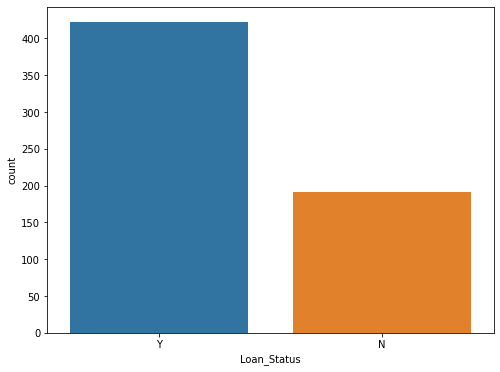

In [6]:
plt.figure(figsize=(8,6))
sns.countplot(df['Loan_Status']);

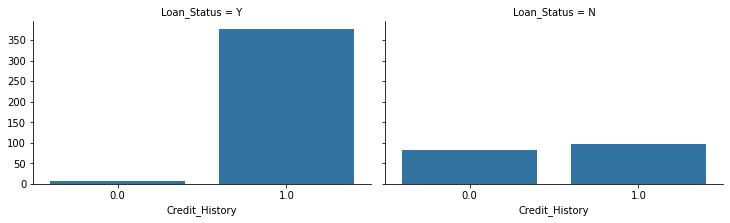

In [7]:
# Credit_History

grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Credit_History');

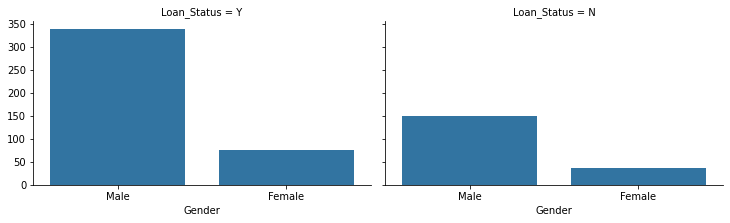

In [8]:
# Gender

grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Gender');


In [9]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

In [10]:
cat_data = []
num_data = []

for i,c in enumerate(df.dtypes):
    if c == object:
        cat_data.append(df.iloc[:, i])
    else :
        num_data.append(df.iloc[:, i])

In [11]:
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [12]:
cat_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [13]:
# cat_data
# If you want to fill every column with its own most frequent value you can use

cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any() # no more missing data 

False

In [14]:
# num_data
# fill every missing value with their previous value in the same column

num_data.fillna(method='bfill', inplace=True)
num_data.isnull().sum().any() # no more missing data

False

In [15]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
cat_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [16]:
target_values = {'Y': 0 , 'N' : 1}

target = cat_data['Loan_Status']
cat_data.drop('Loan_Status', axis=1, inplace=True)

target = target.map(target_values)

In [17]:

for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])

In [18]:
df = pd.concat([cat_data, num_data, target], axis=1)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0,1,0,0,0,0,2,5849.0,0.0,128.0,360.0,1.0,0
1,1,1,1,1,0,0,0,4583.0,1508.0,128.0,360.0,1.0,1
2,2,1,1,0,0,1,2,3000.0,0.0,66.0,360.0,1.0,0
3,3,1,1,0,1,0,2,2583.0,2358.0,120.0,360.0,1.0,0
4,4,1,0,0,0,0,2,6000.0,0.0,141.0,360.0,1.0,0


## Data Standardisation

In [20]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
X = df.iloc[:, :-1]
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
y = df.iloc[:,-1]

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 0)
#test_size=0.2 means %20 test datas, %80 train datas
names_all = []
scores_all = []

## Train the Data

In [22]:
# Cross-validator
from sklearn.model_selection import StratifiedKFold

cross_valid = StratifiedKFold(n_splits=3, shuffle=True, random_state=SEED)

# Define randomized search as a function for later use
def random_search(X, y, estimator, params, score="accuracy", cv=cross_valid, 
                  n_iter=100, random_state=SEED, n_jobs=-1):
    """
    Randomized search of parameters, using "cv" fold cross validation, search 
    across "n_iter" different combinations, and use all available cores
    """
    print("# Tuning hyper-parameters for {} by randomized search".format(score))
    
    classifier = RandomizedSearchCV(estimator=estimator, param_distributions=params, 
                             scoring=score, cv=cv, n_iter=n_iter, n_jobs=n_jobs, 
                             random_state=random_state)
    classifier.fit(X, y)
    
    print("Best parameters by random search:\n", classifier.best_params_)
    return classifier

In [23]:
# Define a function to plot learning curve for later use
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, ylim=None, cv=None, n_jobs=-1,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Plot the test and training learning curves.
    """
    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, scoring='accuracy', cv=cv, n_jobs=n_jobs, 
                       train_sizes=train_sizes, return_times=True)
    
    # Plot learning curve
    fig, ax = plt.subplots()
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", 
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.grid()
    plt.legend(loc="best")
    if ylim is not None:
        plt.ylim(*ylim)
    ax.set(title="Learning curves", 
           xlabel="Training examples", ylabel="Score")
 
    return plt

## XGBoost

In [71]:
# Default params of an svm
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=SEED, verbosity=0)

xgb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 7,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': 0}

In [72]:
# Hyper-parameter tuning
params = {
    'colsample_bytree': list(np.arange(0.6, 1.0, step=0.05)),
    'gamma': list(np.arange(0.1, 15, step=0.2)),
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'max_depth': list(range(2, 12)),
    'min_child_weight': list(range(1, 12)),
    'n_estimators': [10, 100, 500, 1000],
    'reg_alpha': [10**i for i in range(-5, 1)],
    'subsample': list(np.arange(0.6, 1.0, step=0.05))
}

xgb_tuned = random_search(x_train, y_train, estimator=xgb, params=params)

# Tuning hyper-parameters for accuracy by randomized search
Best parameters by random search:
 {'subsample': 0.9500000000000003, 'reg_alpha': 1, 'n_estimators': 10, 'min_child_weight': 7, 'max_depth': 2, 'learning_rate': 0.15, 'gamma': 7.300000000000001, 'colsample_bytree': 0.9500000000000003}


In [74]:
# Prediction on vlaidation data
y_pred = xgb_tuned.predict(x_test)

# Accuracy
accuracy_xgboost = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_xgboost)

Accuracy: 0.8373983739837398


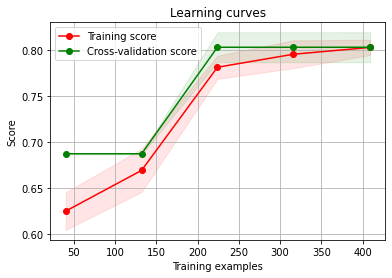

In [75]:
plot_learning_curve(xgb_tuned.best_estimator_, X, y, cv=cross_valid)
plt.show()

## K-Nearest Neighbors

Max accuracy at K = 5
Max accuracy is 0.8292682926829268


Text(0, 0.5, 'score')

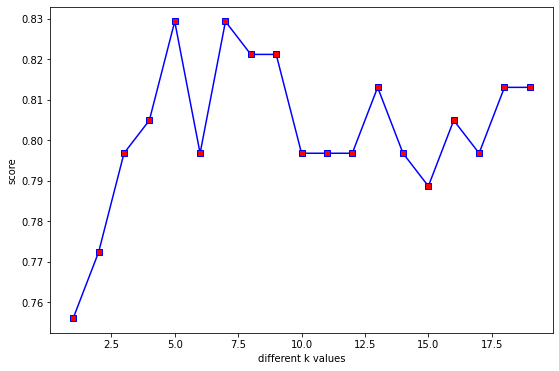

In [76]:
from sklearn.neighbors import KNeighborsClassifier
score_list=[]
for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    score_list.append(knn.score(x_test,y_test))

maxAccuracy = score_list.index(max(score_list))

print('Max accuracy at K = '+str(maxAccuracy+1))
print('Max accuracy is ' + str(score_list[maxAccuracy]))
plt.figure(figsize=(9,6))
plt.plot(range(1,20),score_list,color='blue', marker='s',markerfacecolor='red')
plt.xlabel("different k values")
plt.ylabel("score")

In [77]:
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(x_train,y_train)

KNeighborsClassifier()

In [78]:
# Prediction on vlaidation data
y_pred = knn_5.predict(x_test)

# Accuracy
accuracy_knn = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_knn)

Accuracy: 0.8292682926829268


## Logistic regression

In [79]:
# Default params
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(random_state=SEED)

logistic_regression.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 7,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [91]:
# Hyper-parameter tuning
params = {
    'C': scipy.stats.loguniform(1e-5, 100),
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

logistic_regression_tuned = random_search(
    x_train, y_train, estimator=logistic_regression, params=params)

# Tuning hyper-parameters for accuracy by randomized search
Best parameters by random search:
 {'C': 0.10194767563873067, 'penalty': 'l2', 'solver': 'newton-cg'}


In [92]:
# Prediction on vlaidation data
y_pred = logistic_regression_tuned.predict(x_test)

# Accuracy
accuracy_logistic_regression = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_logistic_regression)

Accuracy: 0.8455284552845529


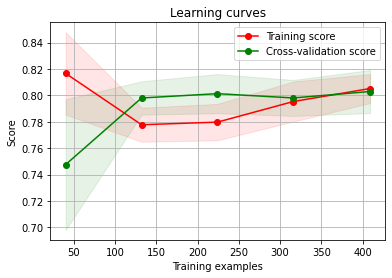

In [93]:
plot_learning_curve(logistic_regression_tuned.best_estimator_, 
                    X, y, cv=cross_valid)
plt.show()

## SVM

In [57]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [58]:
# Prediction on vlaidation data
y_pred = svm_linear.predict(x_test)

# Accuracy
accuracy_svc = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_svc)

Accuracy: 0.8373983739837398


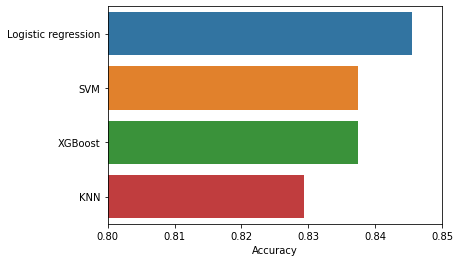

In [94]:
accuracy_df = pd.DataFrame({
    'Model': ['SVM', 'XGBoost',  'KNN', 
              'Logistic regression'],
    'Accuracy': [ accuracy_svc, accuracy_xgboost, accuracy_knn,
                 accuracy_logistic_regression]
})

# Sort
accuracy_df_sorted = accuracy_df.sort_values(by='Accuracy', ascending=False)

# Plot
g = sns.barplot(data=accuracy_df_sorted, y='Model', x='Accuracy')
g.set(ylabel='', xlim=(0.8, 0.85))
plt.show()

## Conclusion

In [96]:
test = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')
cat_data = []
num_data = []

for i,c in enumerate(test.dtypes):
    if c == object:
        cat_data.append(test.iloc[:, i])
    else :
        num_data.append(test.iloc[:, i])
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [97]:
cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
num_data.fillna(method='bfill', inplace=True)

In [98]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])

In [100]:
test = pd.concat([cat_data, num_data], axis=1)

In [101]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,1,1,0,0,0,2,5720.0,0.0,110.0,360.0,1.0
1,1,1,1,1,0,0,2,3076.0,1500.0,126.0,360.0,1.0
2,2,1,1,2,0,0,2,5000.0,1800.0,208.0,360.0,1.0
3,3,1,1,2,0,0,2,2340.0,2546.0,100.0,360.0,1.0
4,4,1,0,0,1,0,2,3276.0,0.0,78.0,360.0,1.0


In [102]:
scaler = StandardScaler()
scaler.fit(test)
test = scaler.transform(test)

## fit test

In [103]:
# Prediction on vlaidation data
y_final = logistic_regression_tuned.predict(test)

In [104]:
test = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')
output = pd.DataFrame({'Loan_ID': test['Loan_ID'], 'Loan_Status': y_final})
output.to_csv('Result.csv', index=False)
print("The results successfully saved!")

The results successfully saved!
